In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import calculate_eddy, dopioe, espra_Rc, plot_ellipse
from utils import dopioe_grid, moca, espra, extract_transect_center

with open('/srv/scratch/z5297792/Sample/frontier_sample_data.pkl', 'rb') as file:
    sample_data = pickle.load(file)
the_frontier_eddies = list(sample_data.keys())

z_r = np.load('/srv/scratch/z5297792/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))[150,150,:]

the_frontier_eddies

['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775']

In [2]:
dic = sample_data['Eddy775']['T0']
dic.keys()

dict_keys(['U', 'V', 'x', 'y', 'z', 'VG', 'COW', 'LNAM', 'rho'])

In [3]:
U, V, x, y, z = dic['U'], dic['V'], dic['x']/1000, dic['y']/1000, -dic['z']/1000
X, Y = np.meshgrid(x, y)
X, Y = X.T, Y.T

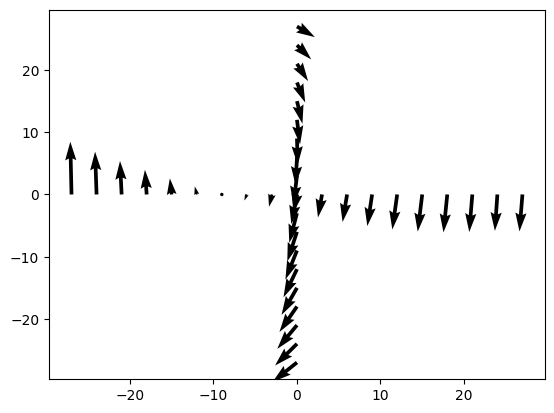

In [4]:
k = 0
u, v = U[:,:,k], V[:,:,k]
dic = extract_transect_center(u, v, X, Y, 0, 0, r=30)

x1 = dic['x1']
y1 = dic['y1']
u1 = dic['u1']
v1 = dic['v1']
xx = dic['xx']
x2 = dic['x2']
y2 = dic['y2']
u2 = dic['u2']
v2 = dic['v2']
yy = dic['yy']

plt.quiver(x1, y1, u1, v1)
plt.quiver(x2, y2, u2, v2)


MOCA 3.2298087852391393 11.067891242800982
DOPIOE 3.4945292889560826 11.88025440933978
ESPRA 3.201663580128539 12.215337540416627


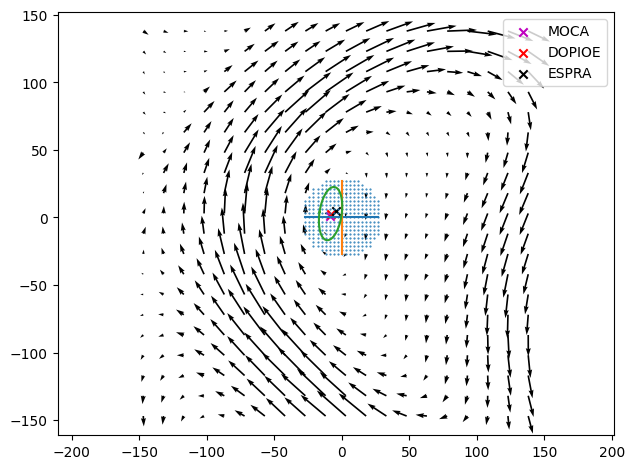

In [5]:
k = 0
spacing = 5
plt.quiver(x[::spacing], y[::spacing], u[::spacing, ::spacing].T, v[::spacing, ::spacing].T)

# nic, njc = len(x)//2, len(y)//2
nic, njc = 49, 49
r = 30

plt.plot(x1, y1)
plt.plot(x2, y2)

# MOCA
l = x1 - x1.min()
VT, VN = u1, v1
l0, r0, wmoca, Qmoca, Rcmoca, psi0moca = moca(l, VT, VN)
x0moca, y0moca = x1.min() + l0, y1[0] + r0
print('MOCA', Rcmoca, psi0moca)
plt.scatter(x0moca, y0moca, marker='x', color='m', label='MOCA')

# DOPIOE
x0, y0, w, Q, Rc_opt, psi0_opt = dopioe(x1, y1, u1, v1, x2, y2, u2, v2)
print('DOPIOE', Rc_opt, psi0_opt)
plt.scatter(x0, y0, marker='x', color='r', label='DOPIOE')

x_ell, y_ell = plot_ellipse(Q, center=(x0, y0), scale=20)
plt.plot(x_ell, y_ell)

# ESPRA
mask = (np.hypot(X - x[nic], Y - y[njc]) < r)
xi, yi = X[mask], Y[mask]
ui, vi = u[mask], v[mask]
x0esp, y0esp, wesp, Qesp, Rc_optesp, psi0_optesp = espra(xi, yi, ui, vi)
print('ESPRA', Rc_optesp, psi0_optesp)
plt.scatter(x0esp, y0esp, marker='x', color='k', label='ESPRA')
plt.scatter(xi, yi, marker='.', s=1)

plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


In [6]:
# df_data = pd.DataFrame(columns=['Eddy', 'Day', 'Method', 'xc', 'yc', 'w', 'Q', 'Rc', 'psi0', 'z', 'Depth'])

# for eddy in sample_data:
#     dic_eddy = sample_data[eddy]
#     for day in dic_eddy:
#         dic = dic_eddy[day]

#         U, V, x, y, z = dic['U'], dic['V'], dic['x']/1000, dic['y']/1000, -dic['z']/1000
#         X, Y = np.meshgrid(x, y)
#         X, Y = X.T, Y.T
#         r = 30

#         x0old, y0old = -12, -12
#         moca_flag = 1
#         dopioe_flag = 1
#         for k in range(25):
    
#             u, v = U[:,:,k], V[:,:,k]
#             dic = extract_transect_center(u, v, X, Y, x0old, y0old, r)
            
#             x1, y1, u1, v1, xx = dic['x1'], dic['y1'], dic['u1'], dic['v1'], dic['xx']
#             x2, y2, u2, v2, yy = dic['x2'], dic['y2'], dic['u2'], dic['v2'], dic['yy']
            
#             # MOCA
#             if moca_flag:
#                 l = x1 - x1.min()
#                 VT, VN = u1, v1
#                 l0, r0, wmoca, Qmoca, Rcmoca, psi0moca = moca(l, VT, VN)
#                 x0moca, y0moca = x1.min() + l0, y1[0] + r0
#                 if not np.isnan(x0moca):
    
#                     # if np.hypot(x0moca - x0old, y0moca - y0old) < 50:
                    
#                     df_data.loc[len(df_data)] = {
#                         'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'MOCA',
#                         'xc': x0moca, 'yc': y0moca, 'w': wmoca,
#                         'Q': Qmoca, 'Rc': Rcmoca, 'psi0': psi0moca,
#                         'z': k, 'Depth': -z_r[k]
#                         }
#                 #     else:
#                 #         moca_flag = 0
#                 # else:
#                 #     moca_flag = 0
            
#             # DOPIOE
#             if dopioe_flag:
#                 x0dop, y0dop, wdop, Qdop, Rcdop, psi0dop = dopioe(x1, y1, u1, v1, x2, y2, u2, v2)
#                 if not np.isnan(x0dop):
    
#                     # if np.hypot(x0dop - x0old, y0dop - y0old) < 50:
                        
#                     df_data.loc[len(df_data)] = {
#                         'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'DOPIOE',
#                         'xc': x0dop, 'yc': y0dop, 'w': wdop,
#                         'Q': Qdop, 'Rc': Rcdop, 'psi0': psi0dop,
#                         'z': k, 'Depth': -z_r[k]
#                         }
#                 #     else:
#                 #         dopioe_flag = 0
#                 # else:
#                 #     dopioe_flag = 0
            
#             # ESPRA
#             mask = (np.hypot(X - x0old, Y - y0old) < r)
#             xi, yi = X[mask], Y[mask]
#             ui, vi = u[mask], v[mask]
#             x0esp, y0esp, wesp, Qesp, Rcesp, psi0esp = espra(xi, yi, ui, vi)
#             if not np.isnan(x0esp):

#                 # if np.hypot(x0esp - x0old, y0esp - y0old) < 50:
                
#                 df_data.loc[len(df_data)] = {
#                     'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'ESPRA',
#                     'xc': x0esp, 'yc': y0esp, 'w': wesp,
#                     'Q': Qesp, 'Rc': Rcesp, 'psi0': psi0esp,
#                     'z': k, 'Depth': -z_r[k]
#                     }
#                 # x0old, y0old = x0esp, y0esp
#             #     else:
#             #         break
#             # else:
#             #     break

#     print(eddy)


In [7]:
# df_data.to_pickle("/srv/scratch/z5297792/Chapter1/df_ESM_data.pkl")


In [8]:
# df_data

#### Paper Plot

In [9]:
df_plot = pd.DataFrame({ 'Eddy': [the_frontier_eddies[0]]*3 + [the_frontier_eddies[1]]*3 
                               + [the_frontier_eddies[2]]*3 + [the_frontier_eddies[3]]*3,
                          'Day': [0, 23, 28,   0, 7, 25,    0, 19, 24,    1, 5, 14],
                            'z': [0, 6, 3,     0, 0, 9,     0, 6, 3,      3, 3,  6]})


In [10]:
df_data = pd.DataFrame(columns=['Eddy', 'Day', 'Method', 'xc', 'yc', 'w', 'Q', 'Rc', 'psi0', 'z', 'Depth'])

Rc_upper_bound = np.inf
psi0_abs_bound = np.inf # 500

for p in range(len(df_plot)):

    eddy, day, k = df_plot.iloc[p].Eddy, df_plot.iloc[p].Day, df_plot.iloc[p].z
    day = f'T{day}'
    
    dic_eddy = sample_data[eddy]

    dic = dic_eddy[day]

    U, V, x, y, z = dic['U'], dic['V'], dic['x']/1000, dic['y']/1000, -dic['z']/1000
    X, Y = np.meshgrid(x, y)
    X, Y = X.T, Y.T
    r = 30

    x0old, y0old = -12, -12
    moca_flag = 1
    dopioe_flag = 1

    u, v = U[:,:,k], V[:,:,k]
    dic = extract_transect_center(u, v, X, Y, x0old, y0old, r)
    
    x1, y1, u1, v1, xx = dic['x1'], dic['y1'], dic['u1'], dic['v1'], dic['xx']
    x2, y2, u2, v2, yy = dic['x2'], dic['y2'], dic['u2'], dic['v2'], dic['yy']
    
    # MOCA
    if moca_flag:
        l = x1 - x1.min()
        VT, VN = u1, v1
        l0, r0, wmoca, Qmoca, Rcmoca, psi0moca = moca(l, VT, VN, Rc_upper_bound=Rc_upper_bound, psi0_abs_bound=psi0_abs_bound)
        x0moca, y0moca = x1.min() + l0, y1[0] + r0
        if not np.isnan(x0moca):

            # if np.hypot(x0moca - x0old, y0moca - y0old) < 50:
            
            df_data.loc[len(df_data)] = {
                'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'MOCA',
                'xc': x0moca, 'yc': y0moca, 'w': wmoca,
                'Q': Qmoca, 'Rc': Rcmoca, 'psi0': psi0moca,
                'z': k, 'Depth': -z_r[k]
                }
        #     else:
        #         moca_flag = 0
        # else:
        #     moca_flag = 0
    
    # DOPIOE
    if dopioe_flag:
        x0dop, y0dop, wdop, Qdop, Rcdop, psi0dop = dopioe(x1, y1, u1, v1, x2, y2, u2, v2, Rc_upper_bound=Rc_upper_bound, psi0_abs_bound=psi0_abs_bound)
        if not np.isnan(x0dop):

            # if np.hypot(x0dop - x0old, y0dop - y0old) < 50:
                
            df_data.loc[len(df_data)] = {
                'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'DOPIOE',
                'xc': x0dop, 'yc': y0dop, 'w': wdop,
                'Q': Qdop, 'Rc': Rcdop, 'psi0': psi0dop,
                'z': k, 'Depth': -z_r[k]
                }
        #     else:
        #         dopioe_flag = 0
        # else:
        #     dopioe_flag = 0
    
    # ESPRA
    mask = (np.hypot(X - x0old, Y - y0old) < r)
    xi, yi = X[mask], Y[mask]
    ui, vi = u[mask], v[mask]
    x0esp, y0esp, wesp, Qesp, Rcesp, psi0esp = espra(xi, yi, ui, vi, Rc_upper_bound=Rc_upper_bound, psi0_abs_bound=psi0_abs_bound)
    if not np.isnan(x0esp):

        # if np.hypot(x0esp - x0old, y0esp - y0old) < 50:
        
        df_data.loc[len(df_data)] = {
            'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'ESPRA',
            'xc': x0esp, 'yc': y0esp, 'w': wesp,
            'Q': Qesp, 'Rc': Rcesp, 'psi0': psi0esp,
            'z': k, 'Depth': -z_r[k]
            }
        # x0old, y0old = x0esp, y0esp
    #     else:
    #         break
    # else:
    #     break


3.9912492461095472 -15.120695144226088
3.9912492461095472 -15.120695144226088
4.749839633596979 -21.724932594238275


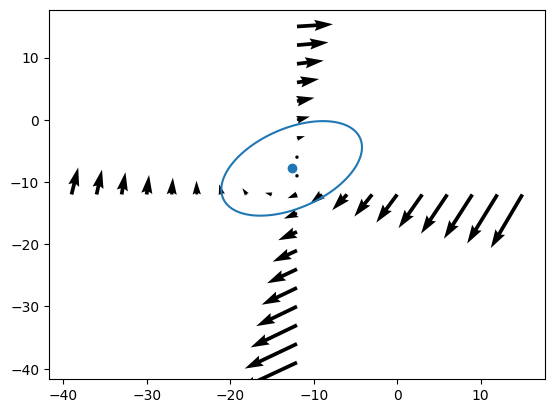

In [11]:
plt.quiver(x1, y1, u1, v1)
plt.quiver(x2, y2, u2, v2)

points1 = set(zip(x1, y1))
points2 = set(zip(x2, y2))
common_points = points1 & points2

# Remove duplicates from (x1, y1, u1, v1)
mask = ~np.array([(x, y) in common_points for x, y in zip(x1, y1)])
x1f = x1[mask]
y1f = y1[mask]
u1f = u1[mask]
v1f = v1[mask]

xi = np.concatenate([x1f, x2])
yi = np.concatenate([y1f, y2])
ui = np.concatenate([u1f, u2])
vi = np.concatenate([v1f, v2])

# xi = np.concatenate([x1, x2])
# yi = np.concatenate([y1, y2])
# ui = np.concatenate([u1, u2])
# vi = np.concatenate([v1, v2])

x0, y0, w, Q, Rc_opt, psi0_opt  = dopioe(x1, y1, u1, v1, x2, y2, u2, v2)
print(Rc_opt, psi0_opt) #wrong
plt.scatter(x0, y0)
x_ell, y_ell = plot_ellipse(Q, (x0,y0), scale=10)
plt.plot(x_ell, y_ell)

Rc_opt, psi0_opt = espra_Rc(xi, yi, ui, vi, x0, y0, Q[0,0], Q[0,1], Q[1,1])
print(Rc_opt, psi0_opt)


x0, y0, w, Q, Rc_opt, psi0_opt = espra(xi, yi, ui, vi)
print(Rc_opt, psi0_opt)


In [12]:
def int_to_excel(n):
    # Convert 0-indexed integer n to an Excel-style column label in lowercase
    n += 1  # Convert to 1-indexed
    result = ""
    while n:
        n, remainder = divmod(n - 1, 26)
        result = chr(97 + remainder) + result  # 97 is ASCII for 'a'
    return result
    

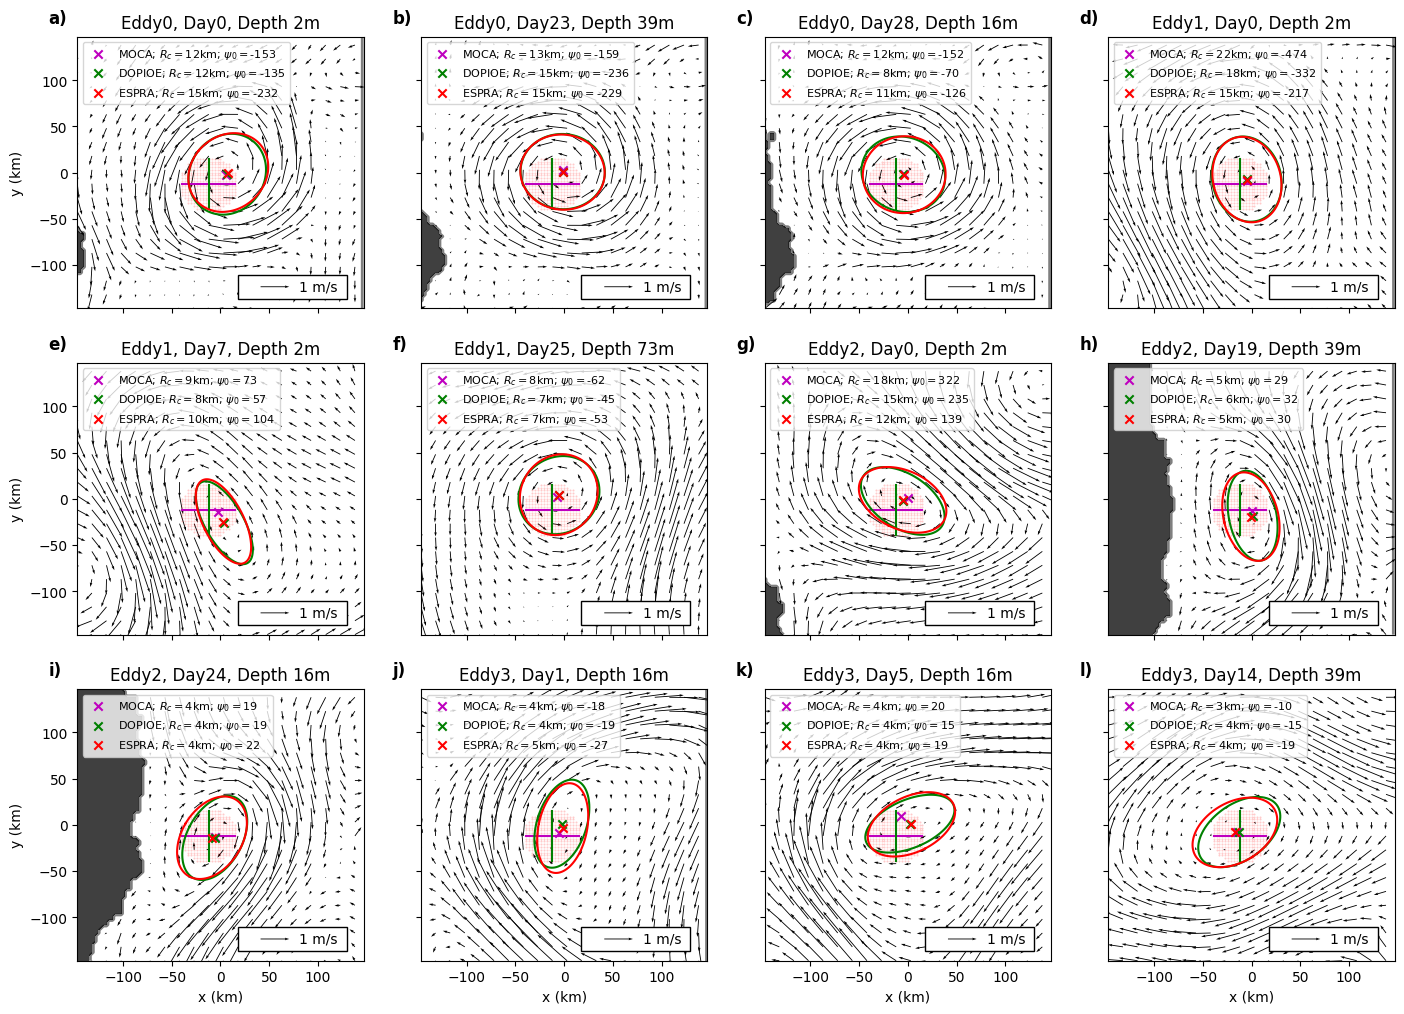

In [13]:
from matplotlib.patches import Rectangle
rows, cols = 3, 4

fig, axs = plt.subplots(rows, cols, figsize=(17, 12), sharey=True, sharex=True)
quiv_scale = 10
for p in range(len(df_plot)):

    ax = axs[p // cols, p % cols]

    eddy, day, k = df_plot.iloc[p].Eddy, df_plot.iloc[p].Day, df_plot.iloc[p].z

    moca_data = df_data[(df_data['Eddy']==eddy)&(df_data['Method']=='MOCA')&(df_data['Day']==day)&(df_data['z']==k)].iloc[0]
    dopioe_data = df_data[(df_data['Eddy']==eddy)&(df_data['Method']=='DOPIOE')&(df_data['Day']==day)&(df_data['z']==k)].iloc[0]
    espra_data = df_data[(df_data['Eddy']==eddy)&(df_data['Method']=='ESPRA')&(df_data['Day']==day)&(df_data['z']==k)].iloc[0]

    dic = sample_data[eddy][f'T{day}']
    U, V, x, y, z = dic['U'], dic['V'], dic['x']/1000, dic['y']/1000, -dic['z']/1000
    u, v = U[:,:,k], V[:,:,k]
    X, Y = np.meshgrid(x, y)
    X, Y = X.T, Y.T

    r = 30
    dic = extract_transect_center(u, v, X, Y, x0old, y0old, r)
    x1, y1, x2, y2 = dic['x1'], dic['y1'], dic['x2'], dic['y2']
    mask = (np.hypot(X - x0old, Y - y0old) < r).T
    xi, yi = X[mask], Y[mask]

    spacing = 5
    quiv = ax.quiver(X[::spacing, ::spacing], Y[::spacing, ::spacing],
              u[::spacing, ::spacing], v[::spacing, ::spacing], scale=quiv_scale)

    ax.scatter(moca_data.xc, moca_data.yc, marker='x', color='m', zorder=5, label=fr'MOCA; $R_c=${round(moca_data.Rc)}km; $\psi_0=${round(moca_data.psi0)}')
    ax.scatter(dopioe_data.xc, dopioe_data.yc, marker='x', color='g', zorder=6, label=fr'DOPIOE; $R_c=${round(dopioe_data.Rc)}km; $\psi_0=${round(dopioe_data.psi0)}')
    ax.scatter(espra_data.xc, espra_data.yc, marker='x', color='r', zorder=7, label=fr'ESPRA; $R_c=${round(espra_data.Rc)}km; $\psi_0=${round(espra_data.psi0)}')
    ax.legend(loc='upper left', fontsize=8)

    ax.plot(x1, y1, color='m')
    ax.plot(x2, y2, color='g')
    ax.scatter(xi, yi, marker='.', s=1, color='r', alpha=.2)

    x_elldop, y_elldop = plot_ellipse(dopioe_data.Q, (dopioe_data.xc, dopioe_data.yc), 50)
    ax.plot(x_elldop, y_elldop, color='g')
    x_ellesp, y_ellesp = plot_ellipse(espra_data.Q, (espra_data.xc, espra_data.yc), 50)
    ax.plot(x_ellesp, y_ellesp, color='r')

    ax.set_title(f'Eddy{np.where(np.array(the_frontier_eddies)==eddy)[0][0]}, Day{day}, Depth {round(-z_r[k])}m')

    if np.any(np.isnan(u)):
        nan_mask = np.isnan(u)
        mask = np.where(~np.isnan(u), np.nan, 0)
        ax.contourf(X, Y, mask, cmap='gray', zorder=-1)
        ax.contour(X, Y, nan_mask, colors='k', linewidths=2, alpha=.5)

    if p // cols == rows - 1:
        ax.set_xlabel('x (km)')
    if p % cols == 0:
        ax.set_ylabel('y (km)')

    ax.text(-0.1, 1.05, int_to_excel(p)+')', transform=ax.transAxes, fontsize=12, fontweight='bold')

    magnitude = 1
    x_pos, y_pos = 0.75, 0.08  
    box_width = 0.38 # Adjust width as needed
    box_height = 0.09  # Adjust height as needed
    rect = Rectangle((x_pos - box_width / 2, y_pos - box_height / 2), 
                           box_width, box_height, transform=ax.transAxes,
                           facecolor='white', edgecolor='black')
    ax.add_patch(rect)
    ax.quiverkey(quiv, X=x_pos-.01, Y=y_pos, U=magnitude,
                 label=f'{magnitude} m/s', labelpos='E')
    

#### Proper Method (Not fixed transects as they are above)

In [14]:
df_data1 = pd.DataFrame(columns=['Eddy', 'Day', 'Method', 'xc', 'yc', 'w', 'Q', 'Rc', 'psi0', 'z', 'Depth'])

Rc_upper_bound = np.inf
psi0_abs_bound = np.inf # 500

for p in range(len(df_plot)):

    eddy, day = df_plot.iloc[p].Eddy, df_plot.iloc[p].Day
    day = f'T{day}'
    
    dic_eddy = sample_data[eddy]

    dic = dic_eddy[day]

    U, V, x, y, z = dic['U'], dic['V'], dic['x']/1000, dic['y']/1000, -dic['z']/1000
    X, Y = np.meshgrid(x, y)
    X, Y = X.T, Y.T
    r = 30

    x0old_moc, y0old_moc = 0, 0
    x0old_dop, y0old_dop = 0, 0
    x0old_esp, y0old_esp = 0, 0

    
    moca_flag = 1
    dopioe_flag = 1
    esp_flag = 1

    for k in range(U.shape[-1]):
    
        u, v = U[:,:,k], V[:,:,k]
        dic_moc = extract_transect_center(u, v, X, Y, x0old_moc, y0old_moc, r)
        dic_dop = extract_transect_center(u, v, X, Y, x0old_dop, y0old_dop, r)
        
        x1_moc, y1_moc, u1_moc, v1_moc, xx_moc = dic_moc['x1'], dic_moc['y1'], dic_moc['u1'], dic_moc['v1'], dic_moc['xx']
    
        x1_dop, y1_dop, u1_dop, v1_dop, xx_dop = dic_dop['x1'], dic_dop['y1'], dic_dop['u1'], dic_dop['v1'], dic_dop['xx']
        x2_dop, y2_dop, u2_dop, v2_dop, yy_dop = dic_dop['x2'], dic_dop['y2'], dic_dop['u2'], dic_dop['v2'], dic_dop['yy']
        
        # MOCA
        if moca_flag:
            l = x1_moc - x1_moc.min()
            VT, VN = u1_moc, v1_moc
            l0, r0, wmoca, Qmoca, Rcmoca, psi0moca = moca(l, VT, VN, Rc_upper_bound=Rc_upper_bound, psi0_abs_bound=psi0_abs_bound)
            x0moca, y0moca = x1_moc.min() + l0, y1_moc[0] + r0
            if not np.isnan(x0moca):
    
                if np.hypot(x0moca - x0old_moc, y0moca - y0old_moc) < 50:
                
                    df_data1.loc[len(df_data1)] = {
                        'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'MOCA',
                        'xc': x0moca, 'yc': y0moca, 'w': wmoca,
                        'Q': Qmoca, 'Rc': Rcmoca, 'psi0': psi0moca,
                        'z': k, 'Depth': -z_r[k]
                        }
                    x0old_moc, y0old_moc = x0moca, y0moca
                else:
                    moca_flag = 0
            else:
                moca_flag = 0
        
        # DOPIOE
        if dopioe_flag:
            x0dop, y0dop, wdop, Qdop, Rcdop, psi0dop = dopioe(x1_dop, y1_dop, u1_dop, v1_dop, x2_dop, y2_dop, u2_dop, v2_dop, Rc_upper_bound=Rc_upper_bound, psi0_abs_bound=psi0_abs_bound)
            if not np.isnan(x0dop):
    
                if np.hypot(x0dop - x0old_dop, y0dop - y0old_dop) < 50:
                    
                    df_data1.loc[len(df_data1)] = {
                        'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'DOPIOE',
                        'xc': x0dop, 'yc': y0dop, 'w': wdop,
                        'Q': Qdop, 'Rc': Rcdop, 'psi0': psi0dop,
                        'z': k, 'Depth': -z_r[k]
                        }
                    x0old_dop, y0old_dop = x0dop, y0dop
                else:
                    dopioe_flag = 0
            else:
                dopioe_flag = 0
        
        # ESPRA
        if esp_flag:
            mask = (np.hypot(X - x0old_esp, Y - y0old_esp) < r)
            xi, yi = X[mask], Y[mask]
            ui, vi = u[mask], v[mask]
            x0esp, y0esp, wesp, Qesp, Rcesp, psi0esp = espra(xi, yi, ui, vi, Rc_upper_bound=Rc_upper_bound, psi0_abs_bound=psi0_abs_bound)
            if not np.isnan(x0esp):
        
                if np.hypot(x0esp - x0old_esp, y0esp - y0old_esp) < 50:
                
                    df_data1.loc[len(df_data1)] = {
                        'Eddy': eddy, 'Day': int(day[1:]), 'Method': 'ESPRA',
                        'xc': x0esp, 'yc': y0esp, 'w': wesp,
                        'Q': Qesp, 'Rc': Rcesp, 'psi0': psi0esp,
                        'z': k, 'Depth': -z_r[k]
                        }
                    x0old_esp, y0old_esp = x0esp, y0esp
                else:
                    esp_flag = 0
            else:
                esp_flag = 0

        

In [15]:
df_data1

,Eddy,Day,Method,xc,yc,w,Q,Rc,psi0,z,Depth
0,Eddy790,0,MOCA,7.158909,-0.558769,0.040640,"[[0.010159926753556373, 0.0], [0.0, 0.01015992...",14.122722,-199.876252,0,1.783320
1,Eddy790,0,DOPIOE,7.039284,-1.436945,0.037305,"[[0.010159926753556373, -0.0008458100999928391...",13.114721,-171.802102,0,1.783320
2,Eddy790,0,ESPRA,7.001717,0.172786,0.035842,"[[0.009849281133105577, -0.001187698022743564]...",13.137499,-176.032425,0,1.783320
3,Eddy790,0,MOCA,6.202183,0.290935,0.040273,"[[0.010068229912351486, 0.0], [0.0, 0.01006822...",24.735348,-611.167144,1,5.879627
4,Eddy790,0,DOPIOE,6.245462,0.477727,0.037111,"[[0.010068229912351467, -0.0009121146595432016...",59.285412,3487.461191,1,5.879627
...,...,...,...,...,...,...,...,...,...,...,...
976,Eddy775,14,DOPIOE,-37.454958,79.476467,-0.004875,"[[-0.0018327631840922933, 0.000224976522308982...",2.603516,7.135330,27,3930.053268
977,Eddy775,14,ESPRA,-42.344150,75.939726,-0.004490,"[[-0.001626850370859163, 0.0001537966837535284...",4.393697,19.723440,27,3930.053268
978,Eddy775,14,MOCA,-39.232101,68.734470,-0.006885,"[[-0.0017211458384638835, 0.0], [0.0, -0.00172...",3.841127,15.435215,28,4460.447022
979,Eddy775,14,DOPIOE,-36.451587,80.657783,-0.005238,"[[-0.0019207216873474015, 0.000194713881096904...",3.373019,12.079693,28,4460.447022


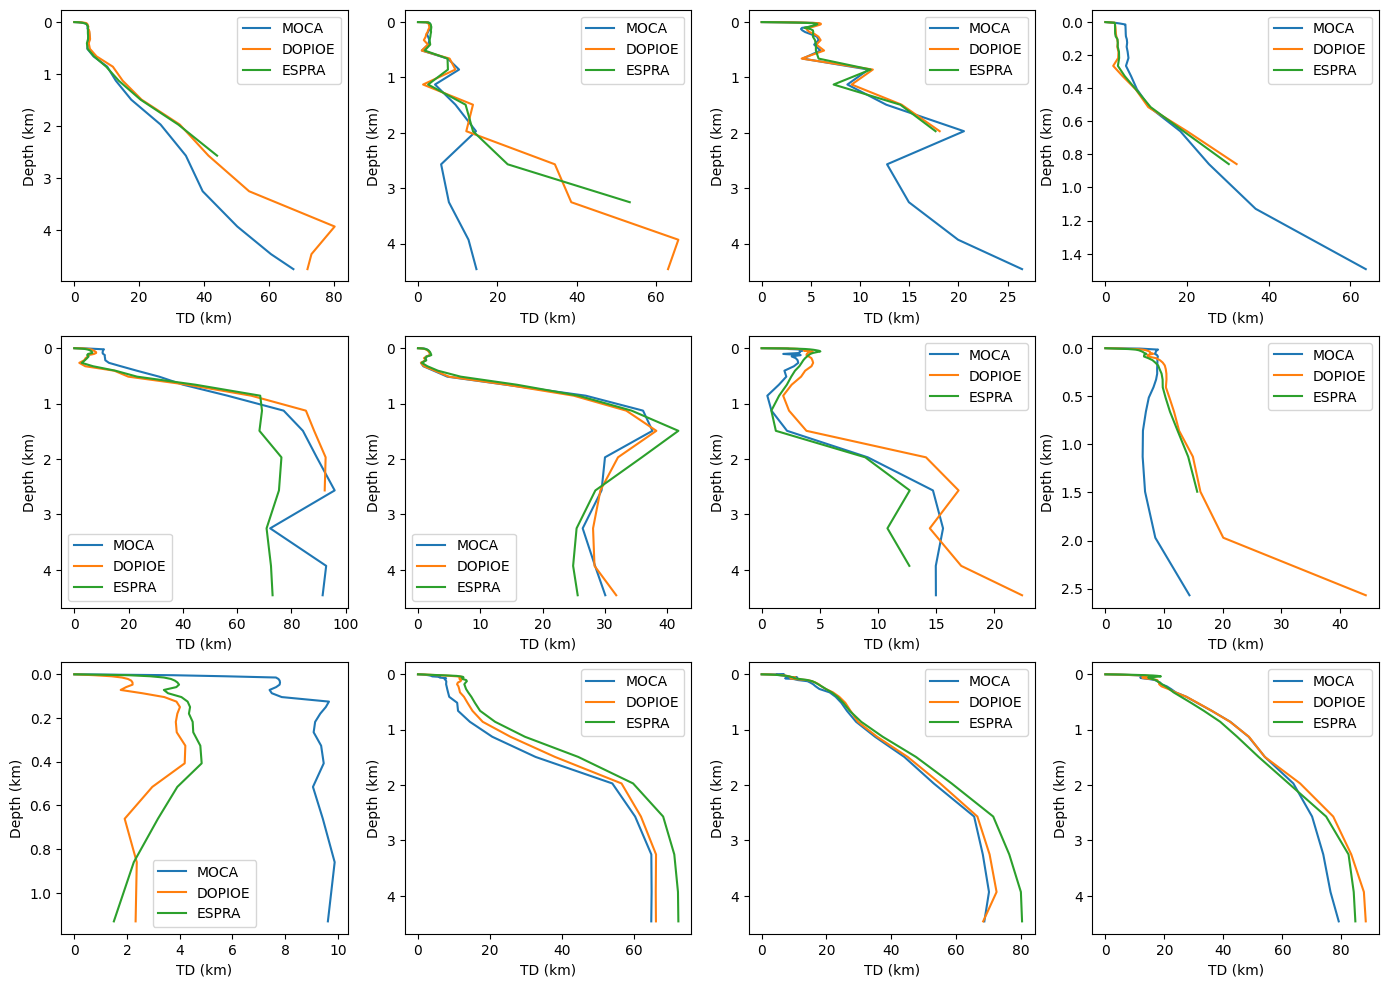

In [20]:
fig, axs = plt.subplots(3, 4, figsize=(17, 12))

k = 0
for e, eddy in enumerate(df_data1['Eddy'].unique()):
    for d, day in enumerate(df_data1['Day'].unique()):

        ax = axs[k // 4, k % 4]
        
        df_moc = df_data1[(df_data1['Eddy']==eddy)&(df_data1['Day']==day)&(df_data1['Method']=='MOCA')]
        df_dop = df_data1[(df_data1['Eddy']==eddy)&(df_data1['Day']==day)&(df_data1['Method']=='DOPIOE')]
        df_esp = df_data1[(df_data1['Eddy']==eddy)&(df_data1['Day']==day)&(df_data1['Method']=='ESPRA')]
        
        if len(df_moc) > 0:
            TD_moc = np.hypot(df_moc['xc']- df_moc[df_moc['z']==0].iloc[0]['xc'],
                              df_moc['yc']- df_moc[df_moc['z']==0].iloc[0]['yc'])
            ax.plot(TD_moc, df_moc['Depth']/1000, label='MOCA')
        if len(df_dop) > 0:
            TD_dop = np.hypot(df_dop['xc']- df_dop[df_dop['z']==0].iloc[0]['xc'],
                              df_dop['yc']- df_dop[df_dop['z']==0].iloc[0]['yc'])
            ax.plot(TD_dop, df_dop['Depth']/1000, label='DOPIOE')
        if len(df_esp) > 0: 
            TD_esp = np.hypot(df_esp['xc']- df_esp[df_esp['z']==0].iloc[0]['xc'],
                              df_esp['yc']- df_esp[df_esp['z']==0].iloc[0]['yc'])
            ax.plot(TD_esp, df_esp['Depth']/1000, label='ESPRA')

        if (len(df_moc) > 0) and (len(df_dop) > 0) and (len(df_esp) > 0):
            k += 1
for ax in axs.flat:
    ax.invert_yaxis()
    ax.legend()
    ax.set_xlabel('TD (km)')
    ax.set_ylabel('Depth (km)')
    

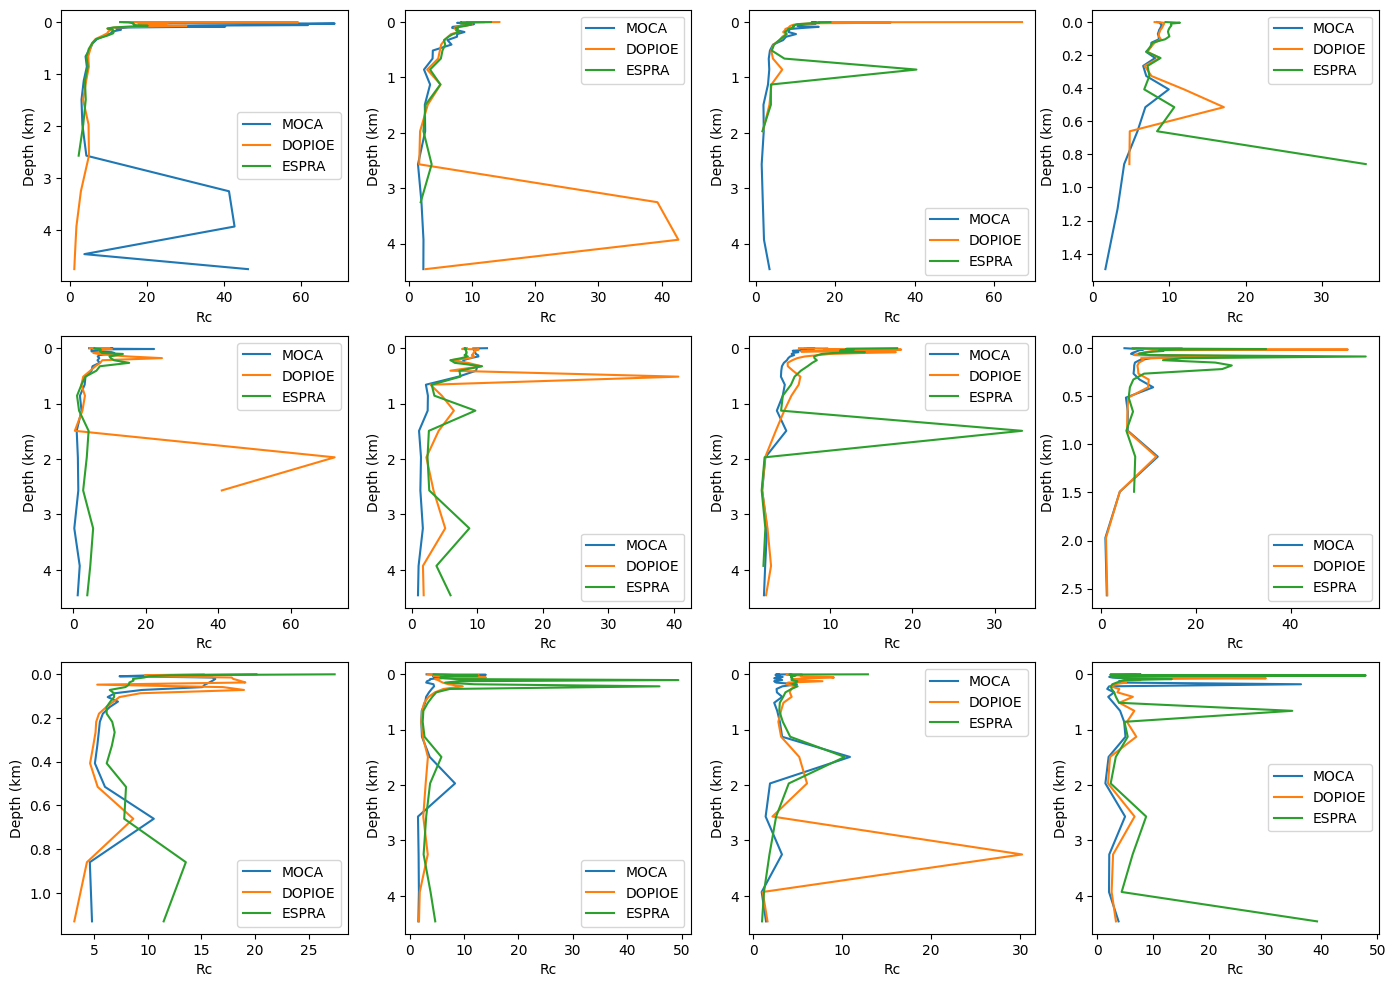

In [21]:
fig, axs = plt.subplots(3, 4, figsize=(17, 12))

k = 0
for e, eddy in enumerate(df_data1['Eddy'].unique()):
    for d, day in enumerate(df_data1['Day'].unique()):

        ax = axs[k // 4, k % 4]
        
        df_moc = df_data1[(df_data1['Eddy']==eddy)&(df_data1['Day']==day)&(df_data1['Method']=='MOCA')]
        df_dop = df_data1[(df_data1['Eddy']==eddy)&(df_data1['Day']==day)&(df_data1['Method']=='DOPIOE')]
        df_esp = df_data1[(df_data1['Eddy']==eddy)&(df_data1['Day']==day)&(df_data1['Method']=='ESPRA')]
        
        if len(df_moc) > 0:

            ax.plot(df_moc['Rc'], df_moc['Depth']/1000, label='MOCA')
        if len(df_dop) > 0:

            ax.plot(df_dop['Rc'], df_dop['Depth']/1000, label='DOPIOE')
        if len(df_esp) > 0: 

            ax.plot(df_esp['Rc'], df_esp['Depth']/1000, label='ESPRA')

        if (len(df_moc) > 0) and (len(df_dop) > 0) and (len(df_esp) > 0):
            k += 1
for ax in axs.flat:
    ax.invert_yaxis()
    ax.legend()
    ax.set_xlabel('Rc')
    ax.set_ylabel('Depth (km)')
    